In [ ]:
#upload drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
fake_df = pd.read_csv("/content/drive/MyDrive/w210/final_data/corrected_combined_fake_images.csv")

In [ ]:
fake_df.head()

,age,region,face_confidence,gender,dominant_gender,race,dominant_race,image_path,non_white
0,35,"{'x': 20, 'y': 28, 'w': 88, 'h': 88, 'left_eye...",0.93,"{'Woman': 84.65195894241333, 'Man': 15.3480425...",Woman,"{'asian': 9.550551149281928, 'indian': 1.84812...",white,/root/.cache/kagglehub/datasets/dullaz/1m-ai-g...,white
1,30,"{'x': 16, 'y': 24, 'w': 95, 'h': 95, 'left_eye...",0.89,"{'Woman': 0.06259322399273515, 'Man': 99.93740...",Man,"{'asian': 0.017521740570927778, 'indian': 0.08...",white,/root/.cache/kagglehub/datasets/dullaz/1m-ai-g...,white
2,26,"{'x': 20, 'y': 23, 'w': 93, 'h': 93, 'left_eye...",0.88,"{'Woman': 0.013609380403067917, 'Man': 99.9863...",Man,"{'asian': 1.1266954914745981, 'indian': 0.3529...",white,/root/.cache/kagglehub/datasets/dullaz/1m-ai-g...,white
3,30,"{'x': 19, 'y': 27, 'w': 85, 'h': 85, 'left_eye...",0.93,"{'Woman': 6.902370601892471, 'Man': 93.0976271...",Man,"{'asian': 0.2802185648437479, 'indian': 0.0535...",white,/root/.cache/kagglehub/datasets/dullaz/1m-ai-g...,white
4,30,"{'x': 18, 'y': 23, 'w': 93, 'h': 93, 'left_eye...",0.91,"{'Woman': 0.0002936724968094495, 'Man': 99.999...",Man,"{'asian': 43.27342212200165, 'indian': 3.45647...",asian,/root/.cache/kagglehub/datasets/dullaz/1m-ai-g...,non-white


In [ ]:
# add the ethnicity column where white=1 and non-white is all the rest and is 0. the information is taken from the non_white column
fake_df['ethnicity'] = fake_df['non_white'].apply(lambda x: 1 if x == 'white' else 0)

In [ ]:
# add a label column where fake is represented with 0.
fake_df['label'] = "0"

In [ ]:
# Extract image_id from image_path
fake_df['image_id'] = fake_df['image_path'].apply(lambda x: os.path.basename(x))

In [ ]:
# drop the columns face_confidence, gender, race, dominant_race, non_white
fake_df = fake_df.drop(columns=['face_confidence', 'gender', 'race', 'dominant_race', 'non_white'])

In [ ]:
# replace the name of the dominant_gender column and call it gender
fake_df = fake_df.rename(columns={'dominant_gender': 'gender'})

In [ ]:
#check what values exist in the gender column and how many of each
fake_df['gender'].value_counts()

,count
gender,
Man,20764
Woman,18936


In [ ]:
#change the gender information to be man = 1 and woman = 0
fake_df['gender'] = fake_df['gender'].apply(lambda x: 1 if x == 'Man' else 0)

In [ ]:
#check the names of the columns
fake_df.columns

Index(['age', 'region', 'gender', 'image_path', 'ethnicity', 'label',
       'image_id'],
      dtype='object')

In [ ]:
# Define the desired column order
column_order = ['image_id', 'image_path', 'region', 'age', 'ethnicity', 'gender', 'label']

# Reorder the DataFrame columns
fake_df = fake_df[column_order]

In [ ]:
fake_df.head()

,image_id,image_path,region,age,ethnicity,gender,label
0,ZPG8996YJ6.jpg,/root/.cache/kagglehub/datasets/dullaz/1m-ai-g...,"{'x': 20, 'y': 28, 'w': 88, 'h': 88, 'left_eye...",35,1,0,0
1,IM2M25SUU9.jpg,/root/.cache/kagglehub/datasets/dullaz/1m-ai-g...,"{'x': 16, 'y': 24, 'w': 95, 'h': 95, 'left_eye...",30,1,1,0
2,MUFPGBRPVK.jpg,/root/.cache/kagglehub/datasets/dullaz/1m-ai-g...,"{'x': 20, 'y': 23, 'w': 93, 'h': 93, 'left_eye...",26,1,1,0
3,6Y2OXVOK4X.jpg,/root/.cache/kagglehub/datasets/dullaz/1m-ai-g...,"{'x': 19, 'y': 27, 'w': 85, 'h': 85, 'left_eye...",30,1,1,0
4,5xpkLy6xbmrCXn6wa6gqmfC9pE16Ct9g.jpeg,/root/.cache/kagglehub/datasets/dullaz/1m-ai-g...,"{'x': 18, 'y': 23, 'w': 93, 'h': 93, 'left_eye...",30,0,1,0


In [ ]:
#check if there are nulls in any of the columns
fake_df.isnull().sum()

,0
image_id,0
image_path,0
region,0
age,0
ethnicity,0
gender,0
label,0


In [ ]:
#count the values in each column
fake_df.count()

,0
image_id,39700
image_path,39700
region,39700
age,39700
ethnicity,39700
gender,39700
label,39700


In [ ]:
#save the new fake_df as a csv to my drive
fake_df.to_csv("/content/drive/MyDrive/w210/final_data/final_million_all_balanced.csv", index=False)


Gender Distribution:
gender
1    20764
0    18936
Name: count, dtype: int64

Ethnicity Distribution:
ethnicity
1    19850
0    19850
Name: count, dtype: int64

Age Distribution Statistics:
count    39700.000000
mean        29.915189
std          6.891324
min         11.000000
25%         26.000000
50%         29.000000
75%         33.000000
max         70.000000
Name: age, dtype: float64


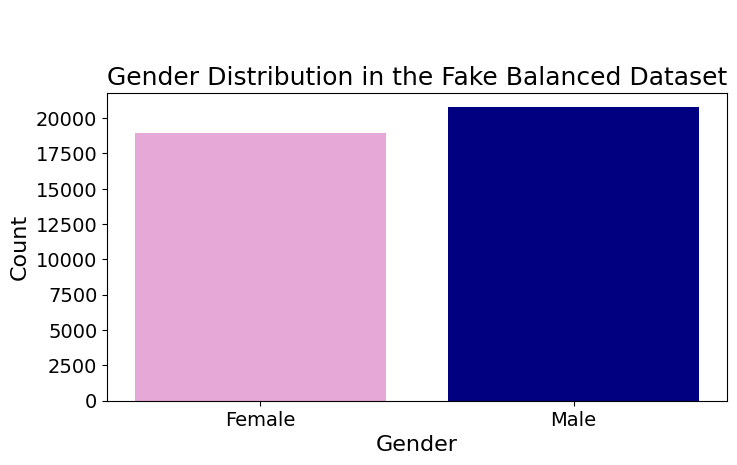

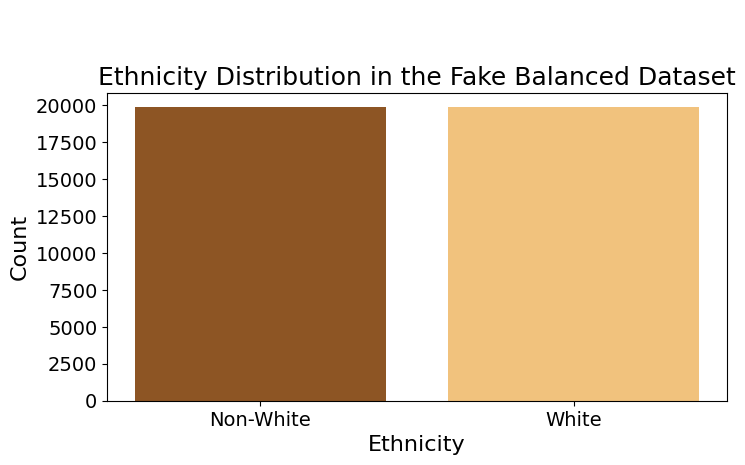

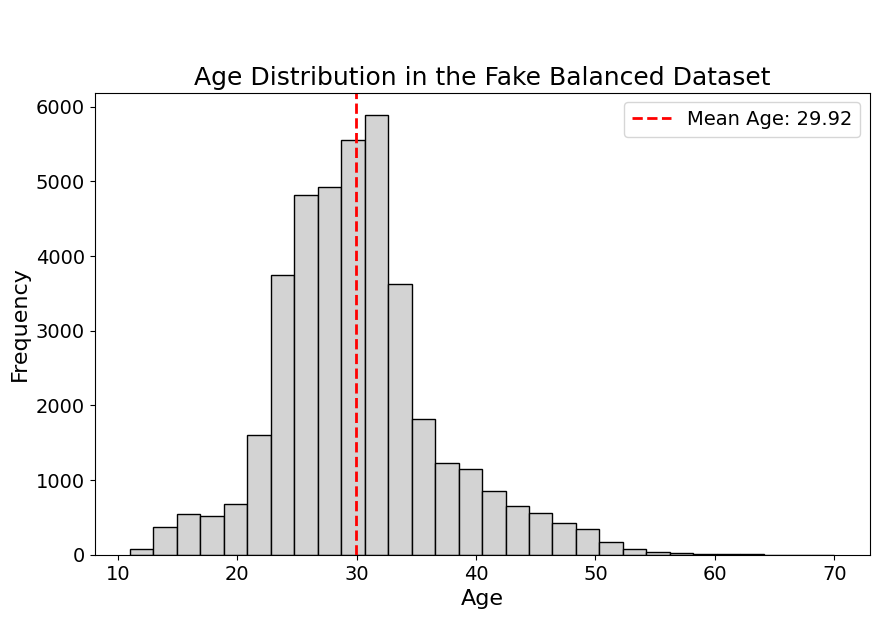

In [ ]:
import matplotlib.pyplot as plt

# Gender distribution
gender_counts = fake_df['gender'].value_counts()
print("\nGender Distribution:")
print(gender_counts)

# Ethnicity distribution
ethnicity_counts = fake_df['ethnicity'].value_counts()
print("\nEthnicity Distribution:")
print(ethnicity_counts)

# Age distribution
age_data = fake_df['age']
print("\nAge Distribution Statistics:")
print(age_data.describe())

# Plot Gender Distribution with Correct Labels
plt.figure(figsize=(8, 4))
plt.bar(gender_counts.index, gender_counts.values, color=[ '#000080', '#E6A8D7'])
plt.title('\n\nGender Distribution in the Fake Balanced Dataset', fontsize=18)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=14)  # Explicit categorical labels
plt.yticks(fontsize=14)
plt.show()

# Plot Ethnicity Distribution with Correct Labels
plt.figure(figsize=(8, 4))
plt.bar(ethnicity_counts.index, ethnicity_counts.values, color=['#F1C27D', '#8D5524'])
plt.title('\n\nEthnicity Distribution in the Fake Balanced Dataset', fontsize=18)
plt.xlabel('Ethnicity', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Non-White', 'White'], fontsize=14)  # Explicit categorical labels
plt.yticks(fontsize=14)
plt.show()

# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=30, color='lightgray', edgecolor='black')
plt.title('\n\nAge Distribution in the Fake Balanced Dataset', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.axvline(age_data.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {age_data.mean():.2f}')
plt.legend(fontsize=14)  # Increase legend font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()